In [3]:

from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

IMG_SIZE = (150, 150)

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2 
)

validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    'dataset/training_set', 
    target_size=IMG_SIZE, 
    batch_size=32,
    class_mode='binary'
)


validation_generator = validation_datagen.flow_from_directory(
    'dataset/test_set',  
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5), 
    layers.Dense(1, activation='sigmoid') 

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5
)

history = model.fit(
    train_generator,
    steps_per_epoch=250, 
    epochs=30,  
    validation_data=validation_generator,
    validation_steps=30, 
    callbacks=[early_stopping, reduce_lr]
)




Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 148, 148, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 72, 72, 64)       256       
 hNormalization)                    

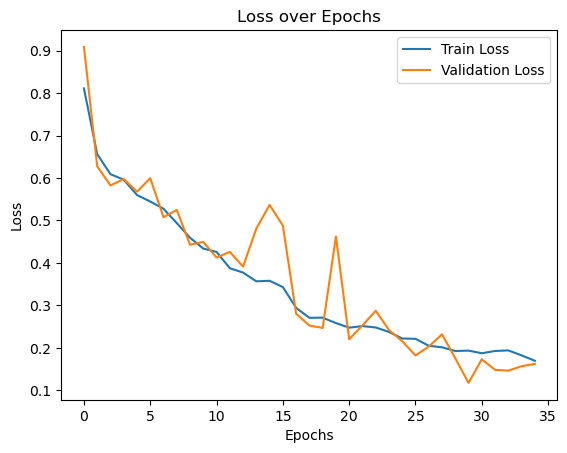

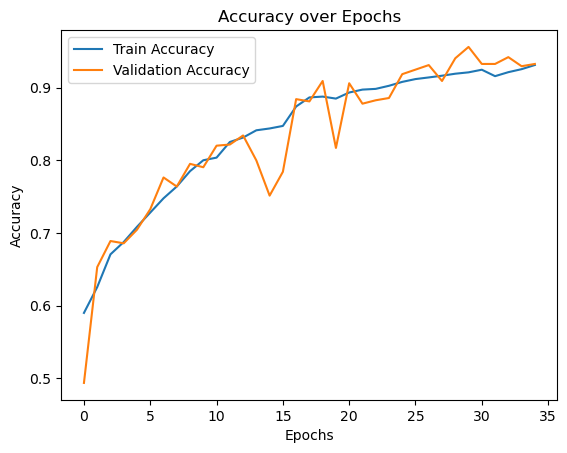

In [2]:
# Visualizing Training Performance
# Plot training and validation loss
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [4]:
single_image_dir = 'dataset/single_prediction'  # Update with actual path
# Load and preprocess each image
for img_name in os.listdir(single_image_dir):
    img_path = os.path.join(single_image_dir, img_name)
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)  # Convert the image to an array
    img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension for batch size

    # Rescale the image for prediction
    img_array = img_array / 255.0

    # Make a prediction
    prediction = model.predict(img_array)

    # Interpret the prediction
    if prediction[0] > 0.5:
        print(f'{img_name}: Dog')
    else:
        print(f'{img_name}: Cat')

1/1 [==============================] - 2s 2s/step
cat.4001.jpg: Cat
1/1 [==============================] - 0s 434ms/step
cat.4002.jpg: Cat
1/1 [==============================] - 1s 679ms/step
cat.4003.jpg: Cat
1/1 [==============================] - 1s 1s/step
cat.4004.jpg: Cat
1/1 [==============================] - 1s 748ms/step
cat.4005.jpg: Cat
1/1 [==============================] - 0s 174ms/step
cat.4006.jpg: Cat
1/1 [==============================] - 1s 773ms/step
cat.4007.jpg: Cat
1/1 [==============================] - 0s 434ms/step
cat.4008.jpg: Cat
1/1 [==============================] - 1s 1s/step
cat.4009.jpg: Cat
1/1 [==============================] - 0s 247ms/step
cat.4010.jpg: Cat
1/1 [==============================] - 0s 361ms/step
cat.4011.jpg: Cat
1/1 [==============================] - 2s 2s/step
cat.4012.jpg: Cat
1/1 [==============================] - 0s 102ms/step
cat.4013.jpg: Cat
1/1 [==============================] - 1s 884ms/step
cat.4014.jpg: Cat
1/1 [=============

In [ ]:
https://github.com/XpChen2024/CNN_ImageClassification_Project